#Repaso 1 27/07

In [19]:
from pydataset import data
import numpy as np
from scipy.stats import skew
from scipy import stats 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

Al igual que en los ejercicios de pair programming de estadística, deberéis elegir un set de datos, puede ser de cualquier tipo. El objetivo de este pair programming es:
Hacer una exploración inicial del dataframe.
¿Cuántas filas tiene?
¿Cuántas nulos tiene?
¿Y duplicados?
¿Qué tipo de datos tenemos en el dataframe?
etc.
Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.
Contestad a las preguntas planteadas usando los principales estadísticos que hemos aprendido y gráficas que mejor se ajusten.

Primero abrimos el archivo.

In [20]:
df = pd.read_csv("data/NYC-Airbnb-2023.csv")
df.head()

/var/folders/cf/7kf7s8j17wn53znl0ywm912w0000gp/T/ipykernel_6197/3873383618.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/NYC-Airbnb-2023.csv")


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


Creamos una función que para saber las propiedades del dataframe.

In [21]:
def propiedades(dataframe):
    """
   Esta función printea en pantalla todas las propiedades del dataframe.
  Args: 
       dataframe(dataframe): el dataframe del cual queremos saber sus propiedades.
   Returns: aunque no tiene return, esta printea en pantalla todas las propiedades del dataframe.
   """
    print("El número de filas y columnas es:", dataframe.shape)
    print(".......................................")
    print("Los nulos y el tipo de dato son:")
    display(dataframe.info())
    print(".......................................")
    print("Los principios estadísticos son:")
    display(dataframe.describe(include = "all"))
    print(".......................................")
    print("El número de duplicados son:", dataframe.duplicated().sum())
    print(".......................................")
   

    for columna in dataframe.columns:
        print("El número de valores únicos de la columna",columna, "es:", len(dataframe[columna].unique()))
        print("--------------------------------------------------")
        if len(dataframe[columna].unique()) < 6:
            print("Los valores únicos de la columna",columna, "son:", dataframe[columna].unique())
            print("**********************************")

In [22]:
propiedades(df)

El número de filas y columnas es: (42931, 18)
.......................................
Los nulos y el tipo de dato son:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              42931 non-null  int64  
 1   name                            42919 non-null  object 
 2   host_id                         42931 non-null  int64  
 3   host_name                       42926 non-null  object 
 4   neighbourhood_group             42931 non-null  object 
 5   neighbourhood                   42931 non-null  object 
 6   latitude                        42931 non-null  float64
 7   longitude                       42931 non-null  float64
 8   room_type                       42931 non-null  object 
 9   price                           42931 non-null  int64  
 10  minimum_nights                  429

None

.......................................
Los principios estadísticos son:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,4.293100e+04,42919,4.293100e+04,42926,42931,42931,42931.000000,42931.000000,42931,42931.000000,42931.000000,42931.000000,32627,32627.000000,42931.000000,42931.000000,42931.000000,1
unique,NaN,41408,NaN,9831,5,223,NaN,NaN,4,NaN,NaN,NaN,2795,NaN,NaN,NaN,NaN,1
top,NaN,Water View King Bed Hotel Room,NaN,Blueground,Manhattan,Bedford-Stuyvesant,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2023-01-02,NaN,NaN,NaN,NaN,41662/AL
freq,NaN,30,NaN,526,17658,3086,NaN,NaN,24279,NaN,NaN,NaN,839,NaN,NaN,NaN,NaN,1
mean,2.222772e+17,NaN,1.516012e+08,NaN,NaN,NaN,40.728273,-73.943665,NaN,200.307167,18.111178,25.856001,NaN,1.168988,24.054809,140.262211,7.736507,NaN
std,3.344213e+17,NaN,1.621301e+08,NaN,NaN,NaN,0.057640,0.056627,NaN,895.082911,27.462513,56.616344,NaN,1.789675,80.867958,142.001486,18.290256,NaN
min,2.595000e+03,NaN,1.678000e+03,NaN,NaN,NaN,40.500314,-74.251907,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.940474e+07,NaN,1.608533e+07,NaN,NaN,NaN,40.687485,-73.981750,NaN,75.000000,2.000000,1.000000,NaN,0.140000,1.000000,0.000000,0.000000,NaN
50%,4.337482e+07,NaN,7.433812e+07,NaN,NaN,NaN,40.724040,-73.952620,NaN,125.000000,7.000000,5.000000,NaN,0.520000,1.000000,89.000000,0.000000,NaN
75%,6.305016e+17,NaN,2.680692e+08,NaN,NaN,NaN,40.762293,-73.924035,NaN,200.000000,30.000000,24.000000,NaN,1.670000,4.000000,289.000000,7.000000,NaN


.......................................
El número de duplicados son: 0
.......................................
El número de valores únicos de la columna id es: 42931
--------------------------------------------------
El número de valores únicos de la columna name es: 41409
--------------------------------------------------
El número de valores únicos de la columna host_id es: 27455
--------------------------------------------------
El número de valores únicos de la columna host_name es: 9832
--------------------------------------------------
El número de valores únicos de la columna neighbourhood_group es: 5
--------------------------------------------------
Los valores únicos de la columna neighbourhood_group son: ['Manhattan' 'Brooklyn' 'Queens' 'Bronx' 'Staten Island']
**********************************
El número de valores únicos de la columna neighbourhood es: 223
--------------------------------------------------
El número de valores únicos de la columna latitude es: 22673
------

Vemos que las columnas tienen pocos nulos y los tipos de datos son muy variados. La columna licence tiene muchos nulos, pero como no lo vamos a utilizar en nuestro analisis no lo borramos. Vemos los otros principios estadísticos de price, que es la columna que vamos a usar.

In [23]:
info = df[["price"]].agg(['var','median'])
display(info)

,price
var,801173.418411
median,125.000000


Vemos que la varianza es muy alta pero porque sus unidades están al cuadrado. Para poder ver realmente la dispersión en la columna de precio tenemos que ver la desviación estándar, que es 895.082911, lo cual es muy alto, por la posible presencia de outliers.

Vemos que el precio es muy dispar, por lo que acotamos el rango para un estudio más exhaustivo.

In [24]:
df_limpio = df[(df["price"] > 0) & (df["price"] < 2500)]

Hacemos un historiograma de la columna price para ver su tendencia, añadimos la media y la mediana para ver si varían mucho.

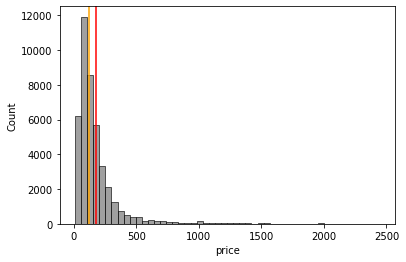

In [25]:
sns.histplot(data=df_limpio, x="price", bins=50, color="grey")
plt.axvline(df_limpio["price"].mean(), color='red')
plt.axvline(df_limpio['price'].median(), color='orange');

In [26]:
skewness = skew(df_limpio['price'])
print(skewness)

4.653210108684269


Como vemos tanto en el histograma como en el skew (positivo), los datos de la columna price están sesgados a la derecha. Además, la media(línea roja) y la mediana (línea naranja) están muy separadas entre sí. Esto se debe a que una media puede estar influenciada por los outliers. Esto puede ser el resultado de que nuestros datos presenten mucha dispersión debido entre otros motivos a  la presencia de outliers, lo que podría implicar que nuestros datos tienen una gran dispersión. 

Calculamos el intervalo de confianza al 95% de la columna precio.

In [27]:
data = df_limpio['price']
print(st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)))
print(np.mean(data))

(176.86872381624627, 180.6795908955484)
178.77415735589733


Como vemos, el intervalo de confianza es muy pequeño, por lo que nos da a entender que hay valores aislados fuera de ese rango.

Ahora procedemos a calcular la moda para identificar los valores que más se repiten.

In [28]:
moda = df[["price", "room_type", "neighbourhood"]].mode()
display(moda)

,price,room_type,neighbourhood
0,150,Entire home/apt,Bedford-Stuyvesant


Vemos que el valor que más se repite en 150 euros la noche, y el tipo de habitación es tipo apartamento y el vecindario es Bedford-Stuyvesant.

Ahora vamos a proceder a calcular la media ponderada para saber si todos los valores tienen el mismo peso para compararlo con la media.

In [29]:
#Media ponderada de price
np.average(df_limpio["price"])

178.77415735589733

La media ponderada es diferente a la media porque hay algunos valores que tienen más peso que otros. Al ser menor, hay algunos precios más bajos con más peso que otros más altos.

Ahora calculamos los coeficientes de variación para saber la relación entre el tamaño de la media y la desviación de la variable.

In [30]:
#Coeficiente de variación
df_limpio[["price", "availability_365"]].std() / df_limpio[["price", "availability_365"]].mean()

price               1.124758
availability_365    1.012554
dtype: float64

Lo valores son muy altos, por lo que hay mucha variabilidad en los datos de las dos columnas.

Vamos a comprobar si es robusto el análisis que estamos haciendo a través del método len para saber cuántos valores han sido analizados.

In [31]:
len(df_limpio["price"])

42782

Son bastantes datos como para considerar que este análisis es robusto.

Ahora vamos a calcular los percentiles para conocer la distribución de los datos.

In [32]:
q1,q3 = np.percentile(df_limpio['price'],[25,75])
print('El primer cuartil es ',q1)
print('El tercer cuartil es ',q3)
print('El rango intercuarílico es ',q3-q1)

El primer cuartil es  75.0
El tercer cuartil es  200.0
El rango intercuarílico es  125.0


In [33]:
q1,q3 = np.percentile(df_limpio['availability_365'],[25,75])
print('El primer cuartil es ',q1)
print('El tercer cuartil es ',q3)
print('El rango intercuarílico es ',q3-q1)

El primer cuartil es  0.0
El tercer cuartil es  288.0
El rango intercuarílico es  288.0


El primer cuartil representa que el 25% de los datos estan por debajo de ese valor, el tercer cuartil representa que el 75% de los datos estan por debajo de ese valor. El rango intercuartílico es el rango donde se encuentra el 50% de valores del conjunto de datos.
Es significativo ver como el 25% de todas las habitaciones no tienen disponibilidad y el 75% de las habitaciones cuestan menos de 200 euros.

A continuación vamos a crear tres gráficos correspondientes a las columnas que estamos analizando para mostrar los datos analizados.

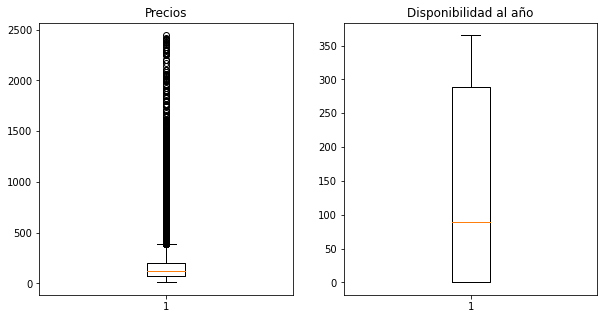

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))


ax[0].boxplot(df_limpio['price'])
ax[0].set_title('Precios')

ax[1].boxplot(df_limpio['availability_365'])
ax[1].set_title('Disponibilidad al año');

Como vemos, hay muchos outliers en la columna de precio, y la caja corresponde con lo visto anteriormente en los cuartiles. Sin embargo, los datos de disponibilidad no tiene outliers y son muy coherentes ya qu el máximo es 365 dias y el mínimo es 0.

Ahora vamos a calcular las frecuencias absolutas de una para variable categórica, en este caso room_type.

In [35]:
df_frecuencias = df_limpio.groupby('room_type').count().reset_index()
df_frecuencias.head()

,room_type,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,Entire home/apt,24194,24189,24194,24192,24194,24194,24194,24194,24194,24194,24194,19011,19011,24194,24194,24194,1
1,Hotel room,170,170,170,170,170,170,170,170,170,170,170,137,137,170,170,170,0
2,Private room,17844,17838,17844,17841,17844,17844,17844,17844,17844,17844,17844,12996,12996,17844,17844,17844,0
3,Shared room,574,573,574,574,574,574,574,574,574,574,574,411,411,574,574,574,0


Realizamos una tabla de contigencia para ver la relación entre dos varaibles categóricas, el tipo de habitación y el vecindario.

In [36]:
pd.crosstab(df_limpio["room_type"], df_limpio["neighbourhood_group"])

neighbourhood_group,Bronx,Brooklyn,Manhattan,Queens,Staten Island
room_type,,,,,
Entire home/apt,772,8895,11188,3090,249
Hotel room,0,5,157,8,0
Private room,875,7130,5989,3676,174
Shared room,42,183,212,134,3


Vemos que lo que hay más son apartamentos en todos los casos, excepto en Bronx que hay más habitaciones privadas. De lo que menos hay son habitaciones de hotel en la plataforma y habitaciones compartidas.

Ahora vamos a ver la relación entre dos variables numéricas, el precio y el mínimo de noches.

In [37]:
correlacion = np.corrcoef(df_limpio['price'], df_limpio['minimum_nights'])

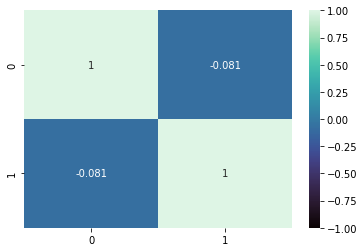

In [38]:
sns.heatmap(correlacion,cmap='mako',annot=True,vmin=-1,vmax=1);

Como vemos, no existe ninguna relación entre esad dos variables, por lo tanto, aunque se esperaba que cuanto mas noches minímas, mas rebaja en el precio, no se aprecia.

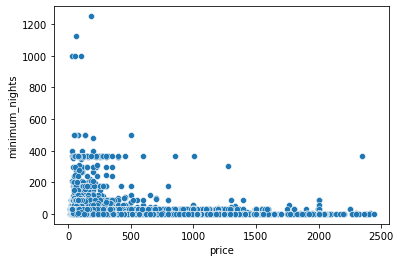

In [39]:
sns.scatterplot(x = df_limpio['price'],y =  df_limpio['minimum_nights']);

Utilizamos esta gráfica para ver que no hay ninguna relación.

Ahora vamos a ver cuantas habitaciones hay en cada vecindario.

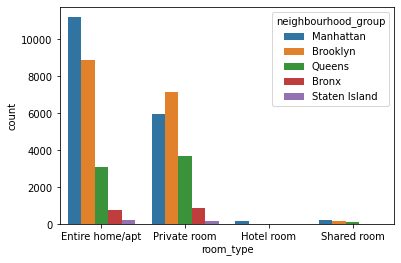

In [40]:
sns.countplot(x = "room_type", data = df_limpio, hue = "neighbourhood_group");

Hay más habitaciones en Manhattan generalmente y sobretodo apartamentos, despues hay habitaciones privadas y hay muy pocas habitaciones de hotel y habitaciones compartidas.

/Users/monicaserranolorenzo/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


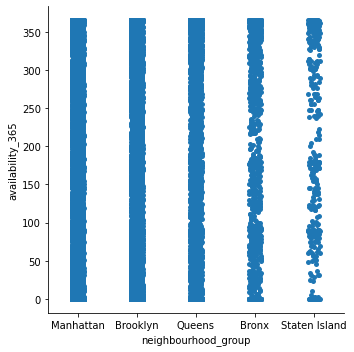

In [41]:
sns.catplot(x = "neighbourhood_group", y = "availability_365", data = df_limpio);

En esta gráfica se puede observar la distribucion de la disponibilidad con respecto al vecindario y realmente vemos que en todos los barrios hay habitaciones con diferentes disponibilidades, aunque se esperaría que los vecindarios más turisticos tuvieran menos disponibilidad.

Por último vamos a ver el precio medio, máximo y mínimo por tipo de habitación.

In [42]:
df_precio_por_tipo = df_limpio.groupby('room_type')["price"].agg(["mean", "max", "min"]).reset_index()
df_precio_por_tipo.head()

,room_type,mean,max,min
0,Entire home/apt,229.868852,2443,10
1,Hotel room,359.188235,1592,99
2,Private room,110.294048,2407,10
3,Shared room,100.557491,2250,15


Como era de esperar el precio medio más alto es de la habiación de hotel, al igual que le precio mínimo. Sin embargo, un dato destacable es que entre los precios máximos, el valor más bajo es el de la habitación de hotel considerablemente de los otras que rondan los 2400 euros, lo cual podemos intuir que serán apartamentos o habitaciones de lujo.